# Feedforward neural network using Keras and Tensorflow MNIST digit dataset

## a. Import the necessary packages


In [1]:
import tensorflow
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## b. Load the training and testing data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

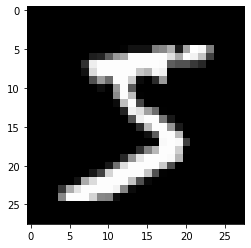

In [4]:
plt.imshow(x_train[0], cmap="gray")

In [5]:
y_train[0]

5

In [7]:
# converting it in the range of 0 to 1

x_train = x_train/255
x_test = x_test/255

In [9]:
# reshaping the training and testing data from 2D to 1D

x_train = x_train.reshape((x_train.shape[0], 1*28*28))
x_test = x_test.reshape((x_test.shape[0], 1*28*28))

In [10]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000,)), ((10000, 784), (10000,)))

## c. Define network architecture using Keras

In [11]:
model = Sequential()

In [12]:
#first layer
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
#last layer
model.add(Dense(10, activation='sigmoid'))


## d. Train the model using SGD

In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________


In [15]:
trained_MNIST = model.fit(x_train, y_train, validation_split = 0.1, epochs=30)

Epoch 1/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6536 - accuracy: 0.8197 - val_loss: 0.2716 - val_accuracy: 0.9227
Epoch 2/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2698 - accuracy: 0.9228 - val_loss: 0.2000 - val_accuracy: 0.9407
Epoch 3/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2078 - accuracy: 0.9400 - val_loss: 0.1580 - val_accuracy: 0.9578
Epoch 4/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1720 - accuracy: 0.9501 - val_loss: 0.1314 - val_accuracy: 0.9635
Epoch 5/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1457 - accuracy: 0.9579 - val_loss: 0.1262 - val_accuracy: 0.9643
Epoch 6/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1266 - accuracy: 0.9628 - val_loss: 0.1143 - val_accuracy: 0.9672
Epoch 7/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.1009 - val_accuracy:

## e. Evaluate the network

In [16]:
test_loss, accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(accuracy)

313/313 [==============================] - 0s 795us/step - loss: 0.0784 - accuracy: 0.9772
0.0783684179186821
0.9771999716758728


In [17]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 760us/step


In [18]:
y_pred

array([[1.09001376e-01, 9.83277243e-03, 7.92647898e-01, ...,
        9.99999523e-01, 4.96228456e-01, 8.95290136e-01],
       [5.81809700e-01, 9.98916805e-01, 1.00000000e+00, ...,
        1.00998000e-06, 8.43464792e-01, 1.01976578e-08],
       [5.05286381e-02, 9.99894202e-01, 4.88580495e-01, ...,
        3.90141666e-01, 8.94059598e-01, 1.67805068e-02],
       ...,
       [6.26578345e-04, 6.67672604e-04, 8.11920166e-02, ...,
        9.77469444e-01, 9.31783855e-01, 9.96618986e-01],
       [2.26422727e-01, 1.06544219e-04, 1.55799444e-05, ...,
        1.79749280e-02, 9.99917746e-01, 1.35280879e-03],
       [9.98561025e-01, 7.04251826e-01, 2.02956811e-01, ...,
        1.17197021e-06, 7.21211851e-01, 3.43266111e-05]], dtype=float32)

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
pred = np.argmax(y_pred, axis=1)

In [23]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
print("\n The Classification report is \n")
print(classification_report(y_test, pred))
print("\n The Confusion Matrix is \n")
print(confusion_matrix(y_test, pred))


 The Classification report is 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 The Confusion Matrix is 

[[ 972    0    1    0    1    0    4    0    1    1]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   2    0 1009    3    3    0    3    7    5    0]
 [   1    1    1  990

## f. Plot the training loss and accuracy

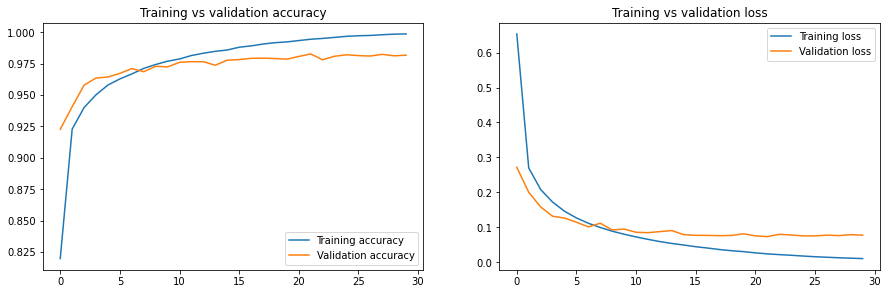

In [25]:
accuracy = trained_MNIST.history['accuracy']
val_accuracy  = trained_MNIST.history['val_accuracy']

loss = trained_MNIST.history['loss']
val_loss = trained_MNIST.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()